# The New York Times and Fox News Headlines Sentiment Analysis

### For sentiment analysis you need to install textbolb module with conda from [textblob](http://textblob.readthedocs.io/en/dev/install.html). Run program with apscheduler, install from from [apscheduler](http://apscheduler.readthedocs.io/en/latest/userguide.html#installing-apscheduler). 

Developed by Dr. Maria P. Frushicheva @ MIT

# NYT News

In [66]:
trump_nyt = {}
clinton_nyt = {}

def nyt():
    
    # install libraries
    from textblob import TextBlob
    import datetime
    from bs4 import BeautifulSoup
    import urllib2
    import re
    
    # store current date and time
    now = datetime.datetime.now()

    # get headlines from NYT website
    def nyt_news():
        url = 'http://www.nytimes.com/'
        html = urllib2.urlopen(url)
        soup = BeautifulSoup(html,"lxml")
        my_search = soup.find_all(re.compile("h"),class_=re.compile("story-heading"))
        headlines=[]

        for link in my_search:
            try:
                if link.string == None:
                    pass
                else:
                    headline = link.string.strip().encode('ascii','ignore')
                    headlines.append(headline)
                    #print headline
            except:
                pass
        #print headlines

        # sentiment analysis    
        trump_sent = 0
        clinton_sent = 0

        for headline in headlines:
            trump = re.search("Trump",headline)
            clinton = re.search("Clinton",headline)
            if trump:
                sent = TextBlob(headline).sentiment.polarity        
                trump_sent = trump_sent + sent
                #print sent, headline
            if clinton:
                sent = TextBlob(headline).sentiment.polarity
                clinton_sent = clinton_sent + sent
                #print sent, headline

        #print "Current date and time: ", now.strftime("%Y-%m-%d %H:%M")
        #print "Trump sentiment:", round(trump_sent,2)
        #print "Clinton sentiment:", round(clinton_sent,2)
    
        return trump_sent, clinton_sent

    
    # store data in trump and clinton dictionaries
    def nyt_news_collect():
        trump_nyt[now.strftime("%Y-%m-%d %H:%M")] = nyt_news()[0]# trump_sent
        clinton_nyt[now.strftime("%Y-%m-%d %H:%M")] = nyt_news()[1] # clinton_sent
        return trump_nyt, clinton_nyt
    
    return nyt_news_collect()

In [68]:
# run apscheduler
from apscheduler.schedulers.background import BackgroundScheduler
scheduler = BackgroundScheduler() # BlockingScheduler()
scheduler.add_job(nyt, 'interval', minutes=1) #seconds=10) # minutes=2) #hours=1)
scheduler.start() # start the scheduler

In [160]:
scheduler.shutdown() # stop the scheduler

In [163]:
nyt() # check results

({'2016-07-29 11:30': -0.3,
  '2016-07-29 11:31': -0.3,
  '2016-07-29 11:32': -0.3,
  '2016-07-29 11:33': -0.3,
  '2016-07-29 11:34': -0.3,
  '2016-07-29 11:35': -0.3,
  '2016-07-29 11:36': -0.3,
  '2016-07-29 11:37': -0.3,
  '2016-07-29 11:38': -0.3,
  '2016-07-29 11:39': -0.3,
  '2016-07-29 11:40': -0.3,
  '2016-07-29 11:41': -0.3,
  '2016-07-29 11:42': -0.3,
  '2016-07-29 11:43': -0.3,
  '2016-07-29 11:44': -0.3,
  '2016-07-29 11:45': -0.3,
  '2016-07-29 11:46': -0.3,
  '2016-07-29 11:47': -0.3,
  '2016-07-29 11:48': -0.3,
  '2016-07-29 11:49': -0.3,
  '2016-07-29 11:50': -0.3,
  '2016-07-29 11:51': -0.3,
  '2016-07-29 11:52': -0.3,
  '2016-07-29 11:53': -0.3,
  '2016-07-29 11:54': -0.3,
  '2016-07-29 11:55': -0.3,
  '2016-07-29 11:56': -0.3,
  '2016-07-29 11:57': -0.3,
  '2016-07-29 11:58': -0.3,
  '2016-07-29 11:59': -0.3,
  '2016-07-29 12:00': -0.3,
  '2016-07-29 12:01': -0.3,
  '2016-07-29 12:02': -0.3,
  '2016-07-29 12:03': -0.3,
  '2016-07-29 12:04': -0.3,
  '2016-07-29 12:05'

In [164]:
# write trump and clinton data in csv files
import csv

trump_dict_nyt= nyt()[0]
clinton_dict_nyt = nyt()[1]
   
fh=open("trump_nyt.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in trump_dict_nyt:
    wr.writerow([item,trump_dict_nyt[item]])
fh.close()   

fh=open("clinton_nyt.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in clinton_dict_nyt:
    wr.writerow([item,clinton_dict_nyt[item]])
fh.close()  

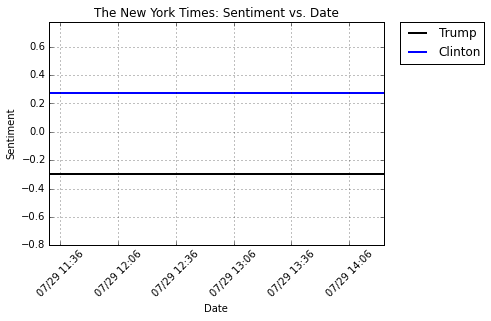

In [165]:
# plot results
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import dates

trump_dict_nyt= nyt()[0]
clinton_dict_nyt = nyt()[1]

y_trump = trump_dict_nyt.values()
y_clinton = clinton_dict_nyt.values()

y_min=min(min(y_trump,y_clinton))-0.5
y_max=max(max(y_trump,y_clinton))+0.5

x=[] # set up x-axis
for key in trump_dict_nyt.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x.append(time)
x.sort()
x_format=dates.DateFormatter('%m/%d %H:%M')
    
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y_trump,'k',linewidth=2.0) # plot for Trump 
plt.plot(x,y_clinton,'b',linewidth=2.0) # plot for Clinton
plt.title('The New York Times: Sentiment vs. Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['Trump','Clinton'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.axis([None,None,y_min,y_max])
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(x_format)
plt.grid(True)
plt.show()

# Fox News

In [134]:
trump_fox = {}
clinton_fox = {}

def fox():
    
    # install libraries
    from textblob import TextBlob
    import datetime
    from bs4 import BeautifulSoup
    import urllib2
    import re
    
    # store current date and time
    now = datetime.datetime.now()

    # get headlines from Fox News website
    def fox_news():
        url = 'http://www.foxnews.com/'
        html = urllib2.urlopen(url)
        soup = BeautifulSoup(html,"lxml")
        my_search = soup.find_all([re.compile("^h"),"a"])
        headlines=[]

        for link in my_search:
            try:
                if link.string == None:
                    pass
                else:
                    headline = link.string.strip().encode('ascii','ignore')
                    headlines.append(headline)
                    #print headline
            except:
                pass
        #print headlines

        # sentiment analysis    
        trump_sent = 0
        clinton_sent = 0

        for headline in headlines:
            trump = re.search("Trump",headline)
            clinton = re.search("Clinton",headline)
            if trump:
                sent = TextBlob(headline).sentiment.polarity        
                trump_sent = trump_sent + sent
                #print sent, headline
            if clinton:
                sent = TextBlob(headline).sentiment.polarity
                clinton_sent = clinton_sent + sent
                #print sent, headline

        #print "Current date and time: ", now.strftime("%Y-%m-%d %H:%M")
        #print "Trump sentiment:", round(trump_sent,2)
        #print "Clinton sentiment:", round(clinton_sent,2)
    
        return trump_sent, clinton_sent

    
    # store data in trump and clinton dictionaries
    def fox_news_collect():
        trump_fox[now.strftime("%Y-%m-%d %H:%M")] = fox_news()[0]# trump_sent
        clinton_fox[now.strftime("%Y-%m-%d %H:%M")] = fox_news()[1] # clinton_sent
        return trump_fox, clinton_fox
    
    return fox_news_collect()

In [135]:
# run apscheduler
from apscheduler.schedulers.background import BackgroundScheduler
scheduler = BackgroundScheduler() # BlockingScheduler()
scheduler.add_job(fox, 'interval', minutes=1) #seconds=10) # minutes=2) #hours=1)
scheduler.start() # start the scheduler

In [161]:
scheduler.shutdown() # stop the scheduler

In [166]:
fox() # check results

({'2016-07-29 14:10': 0.0625,
  '2016-07-29 14:11': 0.0625,
  '2016-07-29 14:16': 0.0625,
  '2016-07-29 14:22': 0.0625,
  '2016-07-29 14:24': 0.0625},
 {'2016-07-29 14:10': 0.0625,
  '2016-07-29 14:11': 0.0625,
  '2016-07-29 14:16': 0.0625,
  '2016-07-29 14:22': 0.0625,
  '2016-07-29 14:24': 0.0625})

In [167]:
# write trump and clinton data in csv files
import csv

trump_dict_fox= fox()[0]
clinton_dict_fox = fox()[1]
   
fh=open("trump_fox.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in trump_dict_fox:
    wr.writerow([item,trump_dict_fox[item]])
fh.close()   

fh=open("clinton_fox.csv",'wb')
wr=csv.writer(fh,dialect='excel')
for item in clinton_dict_fox:
    wr.writerow([item,clinton_dict_fox[item]])
fh.close()  

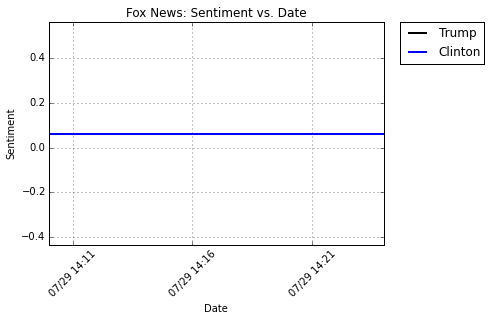

In [168]:
# plot results
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import dates

trump_dict_fox= fox()[0]
clinton_dict_fox = fox()[1]

y_trump = trump_dict_fox.values()
y_clinton = clinton_dict_fox.values()

y_min=min(min(y_trump,y_clinton))-0.5
y_max=max(max(y_trump,y_clinton))+0.5

x=[] # set up x-axis
for key in trump_dict_fox.keys():
    time=datetime.datetime.strptime(key, "%Y-%m-%d %H:%M")
    x.append(time)
x.sort()
x_format=dates.DateFormatter('%m/%d %H:%M')
    
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y_trump,'k',linewidth=2.0) # plot for Trump 
plt.plot(x,y_clinton,'b',linewidth=2.0) # plot for Clinton
plt.title('Fox News: Sentiment vs. Date')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend(['Trump','Clinton'],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.axis([None,None,y_min,y_max])
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(x_format)
plt.grid(True)
plt.show()